## Traffic Sign Classification using Convolutional Neural Network - LeNet


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/UK_traffic_sign_543.svg"
         alt="Real Mona Lisa"  width="400">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Traffic Sign Classification- 
  </td></tr>
</table>

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. Images are 32 X 32 pixels
- Classes are as listed below: 
  - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
  - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
  - (4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
  - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
  - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
  - (10, b'No passing for vehicles over 3.5 metric tons')
  - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
  - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
  - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
  - (18, b'General caution') (19, b'Dangerous curve to the left')
  - (20, b'Dangerous curve to the right') (21, b'Double curve')
  - (22, b'Bumpy road') (23, b'Slippery road')
  - (24, b'Road narrows on the right') (25, b'Road work')
  - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
  - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
  - (31, b'Wild animals crossing')
  - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
  - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
  - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
  - (40, b'Roundabout mandatory') (41, b'End of no passing')
  - (42, b'End of no passing by vehicles over 3.5 metric tons')
- The network used is called LeNet that was presented by Yann LeCun http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

In [1]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import os
import tensorflow as tf

In [2]:
# Note this code is only valid if GPU is being used for training

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


### Load the datasets

In [3]:
# The datasets are binary files and hence loading it differently - this returns a dictionary

with open("D:\\ML-Datasets\\Udemy-DeepLearning\\CNNDatasets\\traffic-signs-data\\train.p", mode='rb') as training_data:
    train = pickle.load(training_data)

with open("D:\\ML-Datasets\\Udemy-DeepLearning\\CNNDatasets\\traffic-signs-data\\train.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)

with open("D:\\ML-Datasets\\Udemy-DeepLearning\\CNNDatasets\\traffic-signs-data\\test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

# View the keys of one of the dataset
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [4]:
# Separate out train, test and validation

X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
# Lets check the shape of train, validation and test
print(f"Shape of Training Features : {X_train.shape}")
print(f"Shape of Training labels : {y_train.shape}")
print("\n")
print(f"Shape of Validation Features : {X_validation.shape}")
print(f"Shape of Validation labels : {y_validation.shape}")
print("\n")
print(f"Shape of Test Features : {X_test.shape}")
print(f"Shape of Test labels : {y_test.shape}")

Shape of Training Features : (34799, 32, 32, 3)
Shape of Training labels : (34799,)


Shape of Validation Features : (34799, 32, 32, 3)
Shape of Validation labels : (34799,)


Shape of Test Features : (12630, 32, 32, 3)
Shape of Test labels : (12630,)


### Visualize the dataset

1

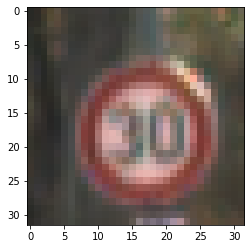

In [6]:
# Lets see the image at index 3100
index = 3100
plt.imshow(X_train[index])
y_train[index]

### Data Preparation

In [7]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [8]:
# Now we will convert the images into gray scales - While we do it, we will preserve the dimensions
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

# We will check the revised shape of the training features
print(f"The Shape of training features: {X_train_gray.shape}")
print(f"The Shape of validation features: {X_validation_gray.shape}")
print(f"The Shape of testing features: {X_test_gray.shape}")

The Shape of training features: (34799, 32, 32, 1)
The Shape of validation features: (34799, 32, 32, 1)
The Shape of testing features: (12630, 32, 32, 1)


In [9]:
# Now normalize the dataset
X_train_gray_norm = (X_train_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [10]:
# Check the normalised training features
X_train_gray_norm

array([[[[-0.26822917],
         [-0.4140625 ],
         [-0.51302083],
         ...,
         [-0.49739583],
         [-0.546875  ],
         [-0.51302083]],

        [[-0.36979167],
         [-0.46875   ],
         [-0.52864583],
         ...,
         [-0.40885417],
         [-0.4609375 ],
         [-0.41145833]],

        [[-0.53385417],
         [-0.52864583],
         [-0.40885417],
         ...,
         [-0.40104167],
         [-0.45052083],
         [-0.4375    ]],

        ...,

        [[-0.66666667],
         [-0.67708333],
         [-0.671875  ],
         ...,
         [-0.73697917],
         [-0.75520833],
         [-0.76041667]],

        [[-0.6796875 ],
         [-0.67708333],
         [-0.68489583],
         ...,
         [-0.75520833],
         [-0.78125   ],
         [-0.78385417]],

        [[-0.68229167],
         [-0.671875  ],
         [-0.671875  ],
         ...,
         [-0.76302083],
         [-0.78125   ],
         [-0.78125   ]]],


       [[[-0.66927083],


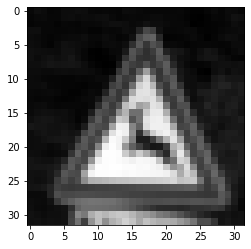

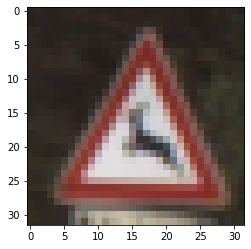

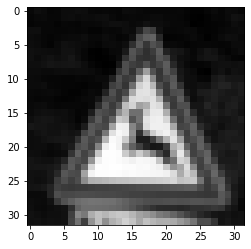

In [11]:
# Now we will visualize this image to see if any features are lost because of normalization
i = 500
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

### Model Building and Training

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [12]:
# Defining the model constants

INPUT_FEATURE_DETECTORS_COUNT = 6
HIDDEN_FEATURE_DETECTORS_COUNT = 16
FEATURE_DETECTORS_DIMENSION = (5, 5)
FIRST_HIDDEN_LAYER_UNITS = 120
SECOND_HIDDEN_LAYER_UNITS = 84
OUTPUT_LAYER_UNITS = 43
INPUT_SHAPE = X_train_gray_norm.shape[1: ]

HIDDEN_LAYER_ACTIVATIONS = tf.keras.activations.relu
OUTPUT_LAYER_ACTIVATION = tf.keras.activations.softmax
OPTIMIZER_FUNCTION = tf.keras.optimizers.Adam()
LOSS_FUNCTION = tf.keras.losses.SparseCategoricalCrossentropy()
METRICS_PARAM = ['accuracy']

BATCH_SIZE = 500
EPOCHS = 50

In [13]:
# Build and Compile the model

LeNet = tf.keras.models.Sequential()

LeNet.add(tf.keras.layers.Conv2D(INPUT_FEATURE_DETECTORS_COUNT, FEATURE_DETECTORS_DIMENSION, 
                                activation=HIDDEN_LAYER_ACTIVATIONS, input_shape=INPUT_SHAPE))
LeNet.add(tf.keras.layers.AveragePooling2D())

LeNet.add(tf.keras.layers.Conv2D(HIDDEN_FEATURE_DETECTORS_COUNT, FEATURE_DETECTORS_DIMENSION,
                                activation=HIDDEN_LAYER_ACTIVATIONS))
LeNet.add(tf.keras.layers.AveragePooling2D())

LeNet.add(tf.keras.layers.Flatten())

LeNet.add(tf.keras.layers.Dense(units=FIRST_HIDDEN_LAYER_UNITS, activation=HIDDEN_LAYER_ACTIVATIONS))
LeNet.add(tf.keras.layers.Dense(units=SECOND_HIDDEN_LAYER_UNITS, activation=HIDDEN_LAYER_ACTIVATIONS))

LeNet.add(tf.keras.layers.Dense(units=OUTPUT_LAYER_UNITS, activation=OUTPUT_LAYER_ACTIVATION))

# Compile the model
LeNet.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER_FUNCTION, metrics=METRICS_PARAM)

# View the model summary
LeNet.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [14]:
# Lets train the model
LeNet.fit(X_train_gray_norm, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1,
          validation_data=(X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 34799 samples
Epoch 1/50
34799/34799 [==============================] - 3s 87us/sample - loss: 3.0950 - accuracy: 0.2029 - val_loss: 2.2301 - val_accuracy: 0.4081
Epoch 2/50
34799/34799 [==============================] - 1s 17us/sample - loss: 1.6179 - accuracy: 0.5410 - val_loss: 1.1844 - val_accuracy: 0.6505
Epoch 3/50
34799/34799 [==============================] - 1s 17us/sample - loss: 0.9634 - accuracy: 0.7200 - val_loss: 0.7965 - val_accuracy: 0.7789
Epoch 4/50
34799/34799 [==============================] - 1s 17us/sample - loss: 0.6969 - accuracy: 0.8004 - val_loss: 0.6019 - val_accuracy: 0.8276
Epoch 5/50
34799/34799 [==============================] - 1s 17us/sample - loss: 0.5521 - accuracy: 0.8467 - val_loss: 0.5029 - val_accuracy: 0.8567
Epoch 6/50
34799/34799 [==============================] - 1s 17us/sample - loss: 0.4548 - accuracy: 0.8761 - val_loss: 0.4461 - val_accuracy: 0.8697
Epoch 7/50
34799/34799 [==============================] 

### Model Evaluation

In [15]:
# Lets evaluate the accuracy on the test set
score = LeNet.evaluate(X_test_gray_norm, y_test, verbose=0)
print(f"Test Accuracy : {score[1]}")

Test Accuracy : 0.8566904067993164


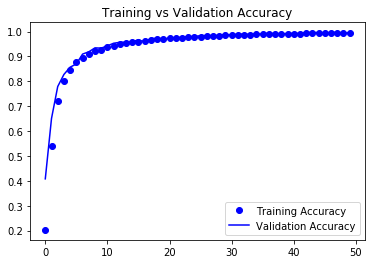

In [16]:
# We will now plot the training accuracy vs validation accuracy

epochs = range(len(LeNet.history.history['accuracy']))
plt.plot(epochs, LeNet.history.history['accuracy'], 'bo', Label='Training Accuracy')
plt.plot(epochs, LeNet.history.history['val_accuracy'], 'b', Label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend()

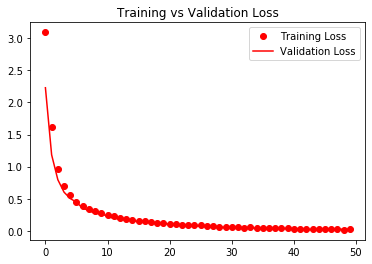

In [17]:
# We will now plot the training loss vs validation loss

plt.plot(epochs, LeNet.history.history['loss'], 'ro', Label='Training Loss')
plt.plot(epochs, LeNet.history.history['val_loss'], 'r', Label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.legend()

Print the Confusion Matrix
[[ 50  10   0 ...   0   0   0]
 [  5 636  45 ...   4   0   0]
 [  0  39 648 ...   2   0   0]
 ...
 [  0   0   0 ...  51   0   0]
 [  0   0   0 ...   0  45   0]
 [  0   0   0 ...   0   4  68]]


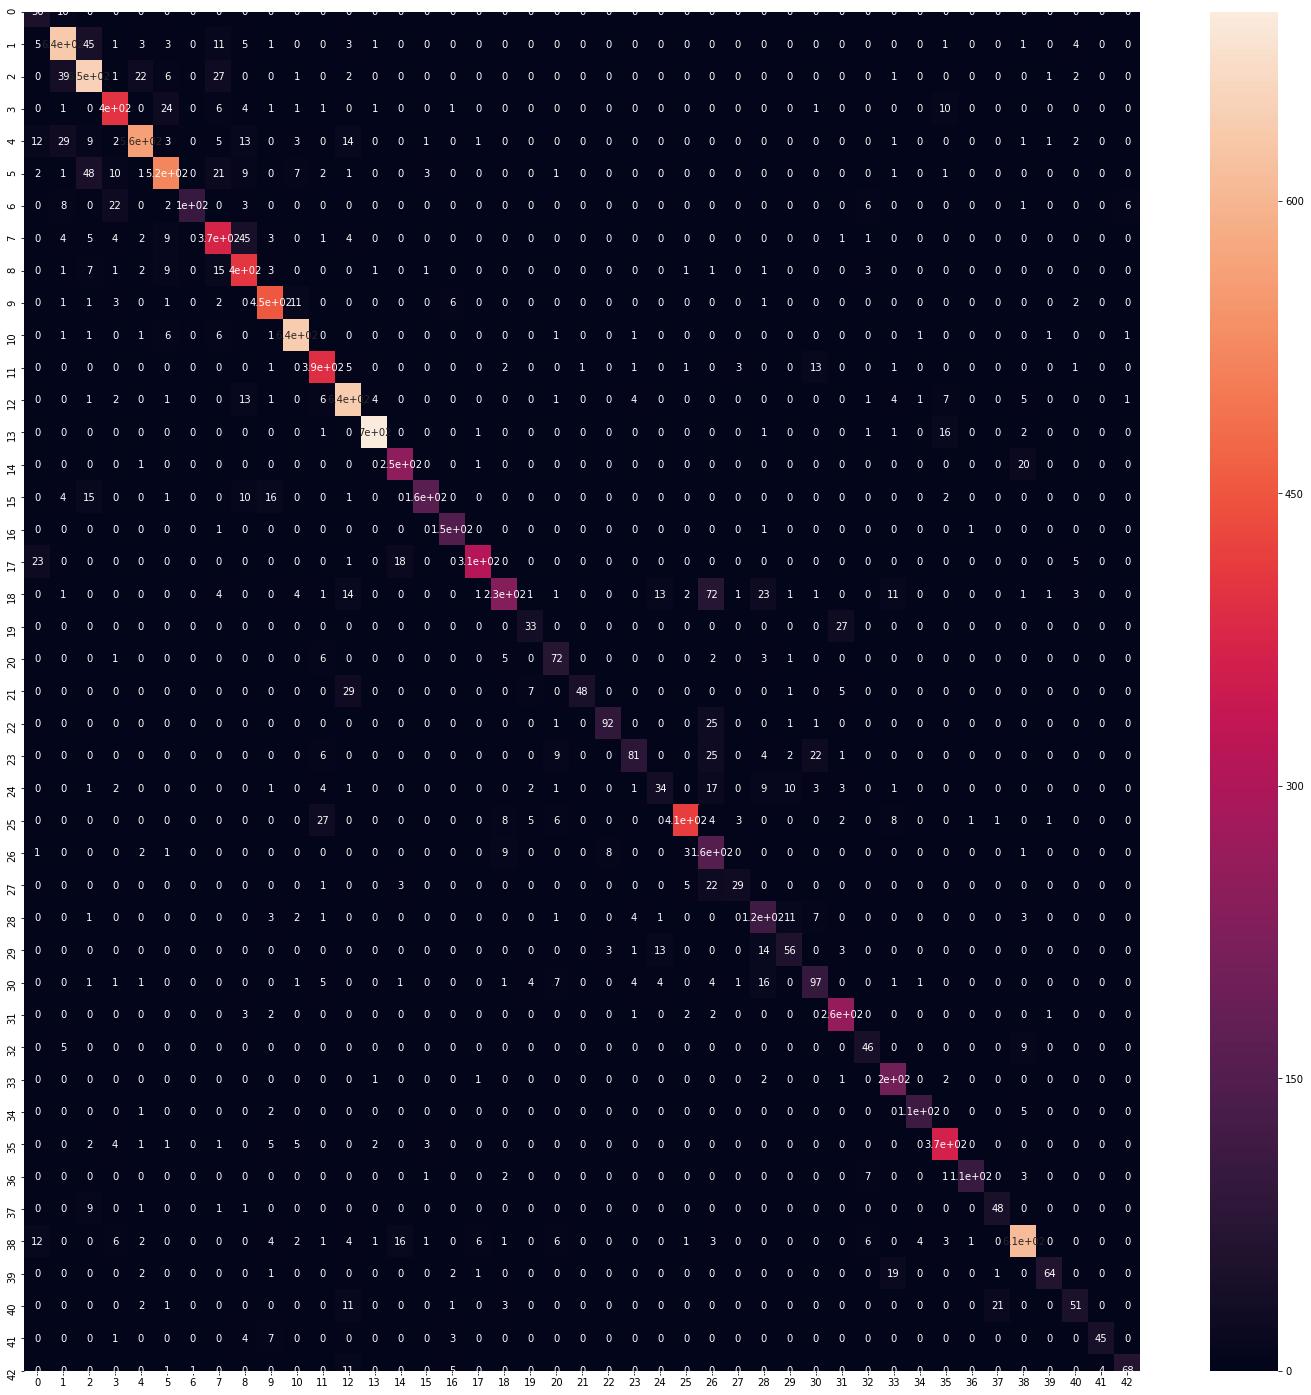

In [18]:
# We will now derive and plot the confusion matrix and classification report

# Now get the predictions on the test data
predicted_classes = LeNet.predict_classes(X_test_gray_norm)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True)

print("Print the Confusion Matrix")
print(cm)

In [19]:
# Print the classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.48      0.83      0.61        60
           1       0.86      0.88      0.87       720
           2       0.82      0.86      0.84       750
           3       0.87      0.89      0.88       450
           4       0.93      0.85      0.89       660
           5       0.88      0.83      0.86       630
           6       0.99      0.68      0.81       150
           7       0.79      0.82      0.81       450
           8       0.79      0.90      0.84       450
           9       0.90      0.94      0.92       480
          10       0.95      0.97      0.96       660
          11       0.86      0.93      0.89       420
          12       0.86      0.92      0.89       690
          13       0.98      0.97      0.98       720
          14       0.87      0.92      0.89       270
          15       0.94      0.77      0.85       210
          16       0.89      0.98      0.93       150
          17       0.96    

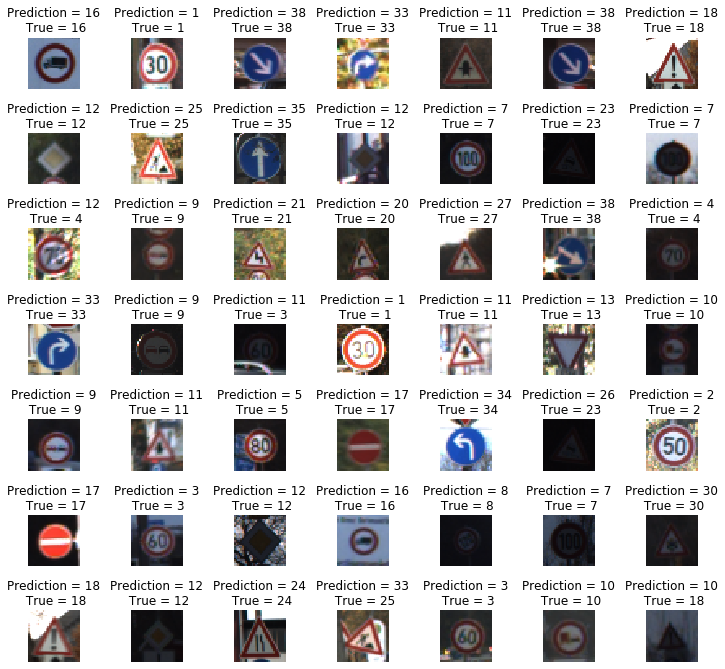

In [20]:
# Now we will print some 50 classes with predictions and see the mistakes wherever

L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

### Lets Demonstrate Tensorboard

In [21]:
import datetime
import os

# Load the TensorBoard notebook extension
%load_ext tensorboard

log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

LeNet.fit(X_train_gray_norm, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1,
          validation_data=(X_validation_gray_norm, y_validation), callbacks=[tensorboard_callback])

Train on 34799 samples, validate on 34799 samples
Epoch 1/50
34799/34799 [==============================] - 1s 32us/sample - loss: 0.0169 - accuracy: 0.9958 - val_loss: 0.0155 - val_accuracy: 0.9966
Epoch 2/50
34799/34799 [==============================] - 1s 19us/sample - loss: 0.0233 - accuracy: 0.9929 - val_loss: 0.0284 - val_accuracy: 0.9911
Epoch 3/50
34799/34799 [==============================] - 1s 19us/sample - loss: 0.0242 - accuracy: 0.9930 - val_loss: 0.0234 - val_accuracy: 0.9929
Epoch 4/50
34799/34799 [==============================] - 1s 18us/sample - loss: 0.0271 - accuracy: 0.9916 - val_loss: 0.0217 - val_accuracy: 0.9937
Epoch 5/50
34799/34799 [==============================] - 1s 18us/sample - loss: 0.0157 - accuracy: 0.9958 - val_loss: 0.0112 - val_accuracy: 0.9980
Epoch 6/50
34799/34799 [==============================] - 1s 18us/sample - loss: 0.0116 - accuracy: 0.9974 - val_loss: 0.0125 - val_accuracy: 0.9970
Epoch 7/50
34799/34799 [==============================] 

In [23]:
# View in tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 12664), started 0:03:11 ago. (Use '!kill 12664' to kill it.)